In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
stock=pd.read_csv("infolimpioavanzadoTarget.csv")
pd.set_option('display.max_columns', None)
stock.head(5)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,RSIadjclose50,RSIvolume50,MACDadjclose15,MACDvolume15,MACDadjclose25,MACDvolume25,MACDadjclose50,MACDvolume50,MACDsig-adjclose-15,MACDdif-adjclose-15-0,MACDdif-adjclose-15-1,MACDdif-adjclose-15-2,MACDdif-adjclose-15-3,MACDsig-volume-15,MACDdif-volume-15-0,MACDdif-volume-15-1,MACDdif-volume-15-2,MACDdif-volume-15-3,MACDsig-adjclose-25,MACDdif-adjclose-25-0,MACDdif-adjclose-25-1,MACDdif-adjclose-25-2,MACDdif-adjclose-25-3,MACDsig-volume-25,MACDdif-volume-25-0,MACDdif-volume-25-1,MACDdif-volume-25-2,MACDdif-volume-25-3,MACDsig-adjclose-50,MACDdif-adjclose-50-0,MACDdif-adjclose-50-1,MACDdif-adjclose-50-2,MACDdif-adjclose-50-3,MACDsig-volume-50,MACDdif-volume-50-0,MACDdif-volume-50-1,MACDdif-volume-50-2,MACDdif-volume-50-3,MACDhistadjclose15,MACDhistvolume15,MACDhistadjclose25,MACDhistvolume25,MACDhistadjclose50,MACDhistvolume50,laglow1,laghigh1,lagvolume1,laglow2,laghigh2,lagvolume2,laglow5,laghigh5,lagvolume5,laglow10,laghigh10,lagvolume10,laglow15,laghigh15,lagvolume15,feargreed,emaadjclose5,emavolume5,emaadjclose10,emavolume10,emaadjclose15,emavolume15,emaadjclose50,emavolume50,smaadjclose5,smavolume5,smaadjclose10,smavolume10,smaadjclose15,smavolume15,smaadjclose25,smavolume25,smaadjclose50,smavolume50,hammer1y1highhighhigh,hammer1y1highhighlow,hammer1y1highhighvolume,hammer1y1highlowhigh,hammer1y1highlowlow,hammer1y1highlowvolume,hammer1y1highvolumehigh,hammer1y1highvolumelow,hammer1y1highvolumevolume,hammer1y1lowhighhigh,hammer1y1lowhighlow,hammer1y1lowhighvolume,hammer1y1lowlowhigh,hammer1y1lowlowlow,hammer1y1lowlowvolume,hammer1y1lowvolumehigh,hammer1y1lowvolumelow,hammer1y1lowvolumevolume,hammer1y1volumehighhigh,hammer1y1volumehighlow,hammer1y1volumehighvolume,hammer1y1volumelowhigh,hammer1y1volumelowlow,hammer1y1volumelowvolume,hammer1y1volumevolumehigh,hammer1y1volumevolumelow,hammer1y1volumevolumevolume,hammer1y2highhighhigh,hammer1y2highhighlow,hammer1y2highhighvolume,hammer1y2highlowhigh,hammer1y2highlowlow,hammer1y2highlowvolume,hammer1y2highvolumehigh,hammer1y2highvolumelow,hammer1y2highvolumevolume,hammer1y2lowhighhigh,hammer1y2lowhighlow,hammer1y2lowhighvolume,hammer1y2lowlowhigh,hammer1y2lowlowlow,hammer1y2lowlowvolume,hammer1y2lowvolumehigh,hammer1y2lowvolumelow,hammer1y2lowvolumevolume,hammer1y2volumehighhigh,hammer1y2volumehighlow,hammer1y2volumehighvolume,hammer1y2volumelowhigh,hammer1y2volumelowlow,hammer1y2volumelowvolume,hammer1y2volumevolumehigh,hammer1y2volumevolumelow,hammer1y2volumevolumevolume,hammer1y3highhighhigh,hammer1y3highhighlow,hammer1y3highhighvolume,hammer1y3highlowhigh,hammer1y3highlowlow,hammer1y3highlowvolume,hammer1y3highvolumehigh,hammer1y3highvolumelow,hammer1y3highvolumevolume,hammer1y3lowhighhigh,hammer1y3lowhighlow,hammer1y3lowhighvolume,hammer1y3lowlowhigh,hammer1y3lowlowlow,hammer1y3lowlowvolume,hammer1y3lowvolumehigh,hammer1y3lowvolumelow,hammer1y3lowvolumevolume,hammer1y3volumehighhigh,hammer1y3volumehighlow,hammer1y3volumehighvolume,hammer1y3volumelowhigh,hammer1y3volumelowlow,hammer1y3volumelowvolume,hammer1y3volumevolumehigh,hammer1y3volumevolumelow,hammer1y3volumevolumevolume,hammer1y10highhighhigh,hammer1y10highhighlow,hammer1y10highhighvolume,hammer1y10highlowhigh,hammer1y10highlowlow,hammer1y10highlowvolume,hammer1y10highvolumehigh,hammer1y10highvolumelow,hammer1y10highvolumevolume,hammer1y10lowhighhigh,hammer1y10lowhighlow,hammer1y10lowhighvolume,hammer1y10lowlowhigh,hammer1y10lowlowlow,hammer1y10lowlowvolume,hammer1y10lowvolumehigh,hammer1y10lowvolumelow,hammer1y10lowvolumevolume,hammer1y10volumehighhigh,hammer1y10volumehighlow,hammer1y10volumehighvolume,hammer1y10volumelowhigh,hammer1y10volumelowlow,hammer1y10volumelowvolume,hammer1y10volumevolumehigh,hammer1y10volumevolumelow,hammer1y10volumevolumevolume,hammer1y15highhighhigh,hammer1y15highhighlow,hammer1y15highhighvolume,hammer1y15highlowhigh,hammer1y15highlowlow,hammer1y15highlowvolume,hammer1y15highvolumehigh,hamm

In [4]:
stock.shape

(7781, 1285)

In [5]:
stock_new=stock[['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']]
stock_new.shape
stock_new.head()

,date,open,high,low,close,adjclose,volume
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800


In [6]:
stock_new['date']=pd.to_datetime(stock_new['date'])
stock_new.set_index(stock_new['date'])
stock_new.sample(5)

C:\Users\ubhal\AppData\Local\Temp\ipykernel_6092\3482419109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_new['date']=pd.to_datetime(stock_new['date'])


,date,open,high,low,close,adjclose,volume
7363,2022-05-04,24.556999,24.590000,24.495001,24.559999,21.975204,5400
948,2022-10-12,403.809998,404.929993,397.510010,398.329987,395.119171,1277100
4223,2022-10-28,5.950000,6.100000,5.760000,6.100000,6.100000,118100
3149,2022-07-21,46.220001,46.669998,45.070000,45.790001,45.244553,191200
6382,2022-06-07,7.250000,8.000000,7.250000,7.500000,7.500000,227440


C:\Users\ubhal\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ubhal\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='adjclose'>

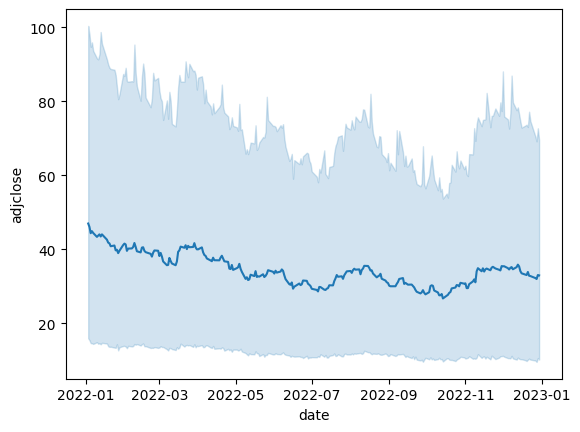

In [7]:
sns.lineplot(x=(stock_new['date'].dt.date), y=stock_new['adjclose'])

In [8]:
stock_new.isnull().sum()
stock_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7781 non-null   datetime64[ns]
 1   open      7781 non-null   float64       
 2   high      7781 non-null   float64       
 3   low       7781 non-null   float64       
 4   close     7781 non-null   float64       
 5   adjclose  7781 non-null   float64       
 6   volume    7781 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 425.7 KB


In [9]:
from sklearn.preprocessing import MinMaxScaler
train_data = stock_new[['adjclose']]
sc = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = sc.fit_transform(train_data)

split_index = int(0.8 * len(train_data_scaled))

X_train = train_data_scaled[:split_index]
y_train = train_data_scaled[1:split_index + 1] 

X_test = train_data_scaled[split_index:-1]
y_test = train_data_scaled[split_index + 1:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [10]:
model=Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")

In [11]:
hist=model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20

195/195 - 7s - loss: 0.0063 - 7s/epoch - 34ms/step
Epoch 2/20
195/195 - 1s - loss: 5.4966e-04 - 1s/epoch - 5ms/step
Epoch 3/20
195/195 - 1s - loss: 5.1689e-04 - 1s/epoch - 6ms/step
Epoch 4/20
195/195 - 1s - loss: 5.6521e-04 - 1s/epoch - 6ms/step
Epoch 5/20
195/195 - 1s - loss: 4.8840e-04 - 1s/epoch - 6ms/step
Epoch 6/20
195/195 - 1s - loss: 5.3683e-04 - 1s/epoch - 6ms/step
Epoch 7/20
195/195 - 1s - loss: 4.9440e-04 - 1s/epoch - 7ms/step
Epoch 8/20
195/195 - 1s - loss: 5.8613e-04 - 1s/epoch - 6ms/step
Epoch 9/20
195/195 - 1s - loss: 4.3549e-04 - 1s/epoch - 6ms/step
Epoch 10/20
195/195 - 1s - loss: 4.5503e-04 - 1s/epoch - 6ms/step
Epoch 11/20
195/195 - 1s - loss: 5.5991e-04 - 1s/epoch - 6ms/step
Epoch 12/20
195/195 - 1s - loss: 4.2407e-04 - 930ms/epoch - 5ms/step
Epoch 13/20
195/195 - 1s - loss: 5.2202e-04 - 924ms/epoch - 5ms/step
Epoch 14/20
195/195 - 1s - loss: 4.6502e-04 - 922ms/epoch - 5ms/step
Epoch 15/20
195/195 - 1s - loss: 4.3101e-04 - 933ms/epoch - 5ms/step
Epoch 16/

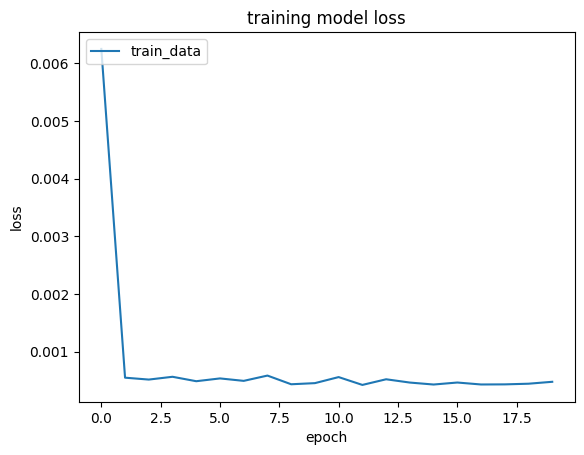

In [12]:
plt.plot(hist.history['loss'])
plt.title('training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_data'], loc='upper left')
plt.show()

In [13]:
y_pred=model.predict(X_test)

49/49 [==============================] - 1s 3ms/step


In [15]:
y_pred_2d = y_pred.reshape(y_pred.shape[0], y_pred.shape[1])
predicted_price = sc.inverse_transform(y_pred_2d)

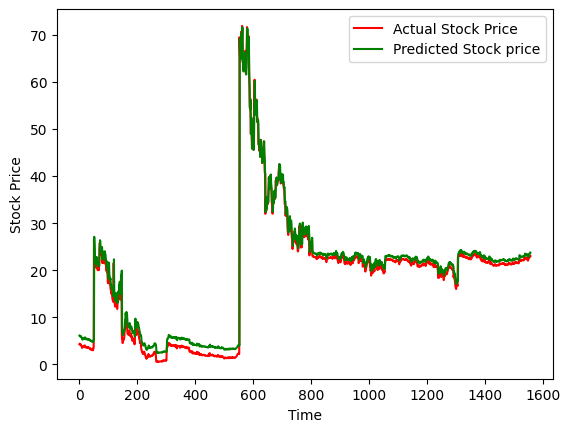

In [17]:
plt.plot(sc.inverse_transform(y_test), color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock price')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()